# Assignment 1

Dear students, you have successfully cloned the repo. Great! :)

This assignment includes a warm-up task "Image_I/O" and the task "Color spaces and morphological operators" from the first lecture.

## Task 0 - Image-I/O

There are several python libraries for reading and displaying images. I recommend scikit-image. Execute the next cell and install missing libraries like scikit-image. 

In [52]:
# imports
%matplotlib inline
from skimage import io, data, color
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

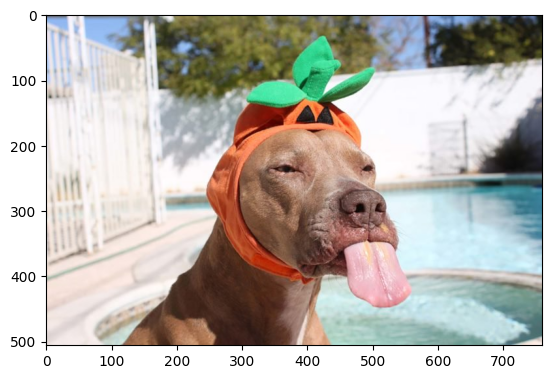

In [33]:
image_dog = io.imread('images/dog.jpg')
plt.imshow(image_dog)
plt.show()

By the way, there are many test images in skimage.data that you can use for your tasks. Execute the next two cells. 

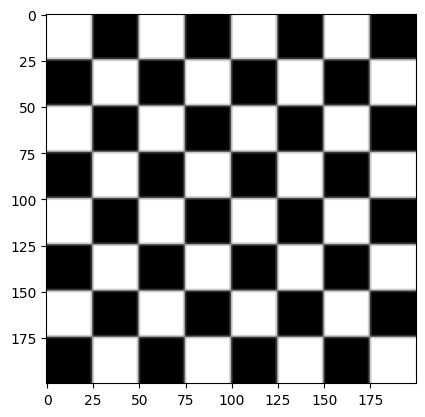

In [34]:
image_check = data.checkerboard()
plt.imshow(image_check, cmap='gray')
plt.show()

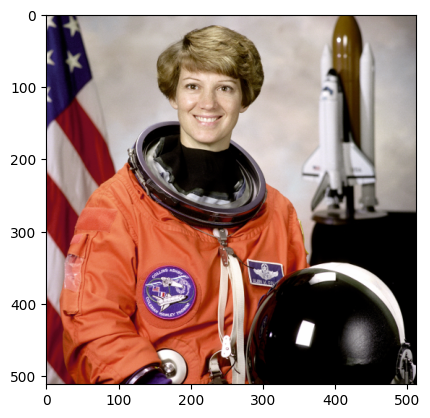

In [35]:
image_astro = data.astronaut()
plt.imshow(image_astro)
plt.show()

Add a line of code to the next cell to display 440 <= x <= 540 and 250 <= y <= 390 for the dog image!

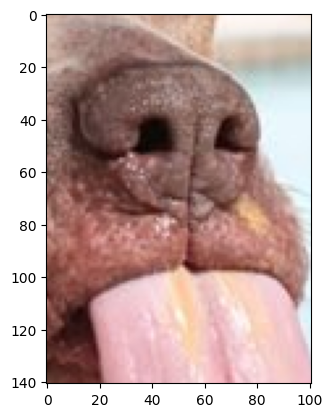

In [38]:
cut_image = image_dog[250:391, 440:541]
plt.imshow(cut_image)
plt.show()

Now convert the color image to a grayscale image and display it!

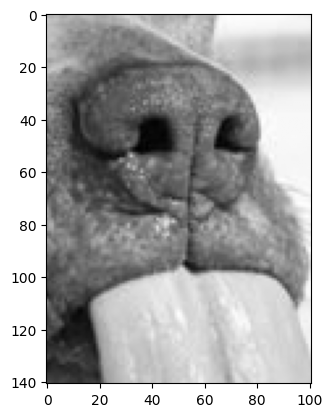

In [41]:
from skimage.color import rgb2gray

gray_img = rgb2gray(cut_image)

plt.imshow(gray_img, cmap='gray')
plt.show()

There are other color spaces. For example, HSV will be used in the lecture. Convert your image to HSV and display the H-channel.

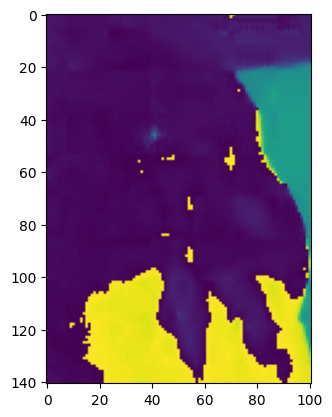

In [48]:
from skimage.color import rgb2hsv

hsv_img = rgb2hsv(cut_image)
h_img = hsv_img[:,:,0]

plt.imshow(h_img)
plt.show()

Did you know that HSV now allows creating robust (i.e. lighting independent) color histograms? Create one with Matplotlib!

[[0.05426357 0.05555556 0.05       ... 0.06818182 0.08333333 0.08333333]
 [0.05555556 0.05555556 0.05       ... 0.07894737 0.08333333 0.06818182]
 [0.05555556 0.06097561 0.05555556 ... 0.08333333 0.08333333 0.07894737]
 ...
 [0.03488372 0.03787879 0.0326087  ... 0.95833333 0.95833333 0.95075758]
 [0.03787879 0.0326087  0.0326087  ... 0.95987654 0.96       0.95289855]
 [0.0326087  0.03191489 0.03333333 ... 0.95987654 0.95987654 0.96      ]]


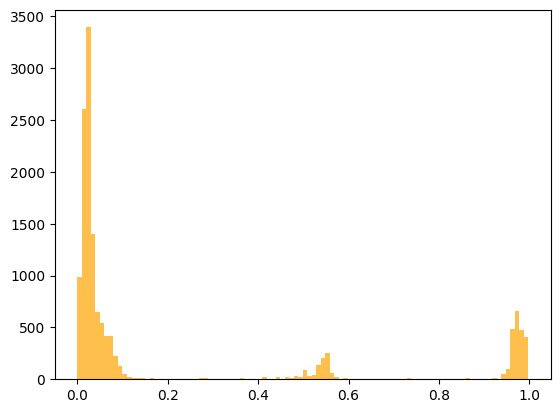

In [57]:
print(h_img)
plt.hist(h_img.ravel(), bins=100, color='orange', alpha =0.7)
plt.show()

## Task 1 - Color Spaces and Morphological Operators

### Task 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put an example image in `/images`.

* Define the „positive“ subspace P in the RGB cube
* Iterate over all pixels in I and check if in P or ~P
* Write result to new image
* Play around with size and shape of P and display binary image (**RESULT**)

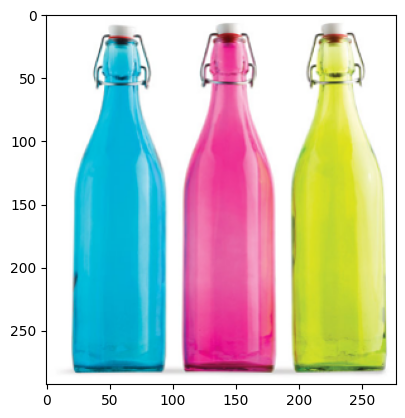

uint8
0 255


In [124]:
image = io.imread('images/bottles.png')
plt.imshow(image)
plt.show()
print(image.dtype)
print(image.min(), image.max())

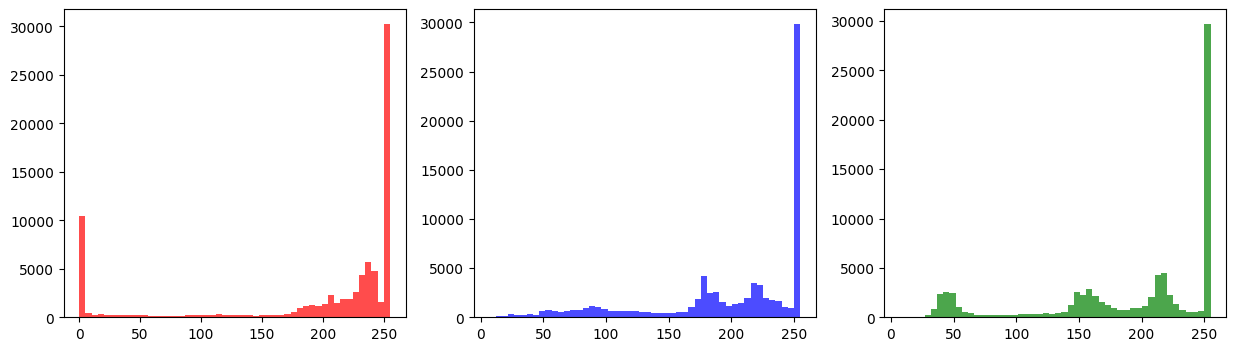

In [12]:
r_image = image[:,:,0]
g_image = image[:,:,1]
b_image = image[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(15,4))
axes[0].hist(r_image.ravel(), bins = 50, color = 'red', alpha = 0.7)
axes[1].hist(g_image.ravel(), bins = 50, color = 'blue', alpha = 0.7)
axes[2].hist(b_image.ravel(), bins = 50, color = 'green', alpha = 0.7)
plt.show()

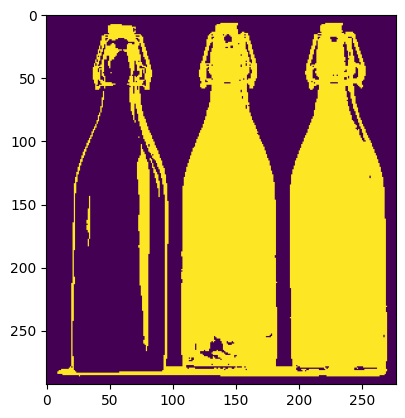

In [94]:
r_min, g_min, b_min = 70, 40, 20
r_max, g_max, b_max = 250, 250, 254

mask = ((image[:,:,0] > r_min) & (image[:,:,0] < r_max) & (image[:,:,1] > b_min) & (image[:,:,1] < b_max) &
        (image[:, :, 2] > b_min) & (image[:, :, 2] < b_max))

binary_image = np.zeros(mask.shape, dtype = np.uint8)
binary_image[mask] = 255

plt.imshow(binary_image)
plt.show()

### Task 1.2

* Take your binary color detection image
* Erase noise with an erosion operation
* Dilate once to get original size of object
* Find connected components with the two-pass algorithm
* Extract the bounding box on the fly
* Draw the bounding box on original image (**RESULT**)

In [118]:
def erosion(binary_image):
    h_img, w_img = binary_image.shape
    padded = np.pad(binary_image, ((1,1),(1,1)), mode = 'constant', constant_values=0)
    erroded = np.zeros_like(binary_image) # zeros_like -> same dtype as binary_image

    for y in range(h_img):
        for x in range(w_img):
            center = padded[y+1, x+1]
            up = padded[y, x+1]
            down = padded[y+2, x+1]
            left = padded[y+1, x]
            right = padded[y+1, x+2]

            if up & down & right & left:
                erroded[y,x] = 1

    return erroded

In [121]:
def dilation(binary_image):
    h_img, w_img = binary_image.shape
    padded = np.pad(binary_image, ((1,1),(1,1)), mode = 'constant', constant_values=0)
    deleated = np.zeros_like(binary_image) # zeros_like -> same dtype as binary_image

    for y in range(h_img):
        for x in range(w_img):
            center = padded[y+1, x+1]
            up = padded[y, x+1]
            down = padded[y+2, x+1]
            left = padded[y+1, x]
            right = padded[y+1, x+2]

            if up or down or right or left:
                deleated[y,x] = 1

    return deleated

In [120]:
def find_root(l,parent):
    while parent[l] != l:
        l = parent[l]
    return l

def two_pass(b_image):
    equivalences = {}
    labels = np.zeros_like(b_image)
    label = 1
    for y in range(b_image.shape[0]):
        for x in range(b_image.shape[1]):
            if b_image[y,x] == 0:
                continue
            neighbors = []
            if y > 0 and labels[y-1,x] > 0:
                neighbors.append(labels[y-1,x])
            if x > 0 and labels[y,x-1] > 0:
                neighbors.append(labels[y, x-1])
            if not neighbors:
                labels[y,x] = label
                label += 1
            else:
                min_label = min(neighbors)
                labels[y,x] = min_label

            for l in neighbors:
                if l != min_label:
                    equivalences.setdefault(l,set()).add(min_label)
                    equivalences.setdefault(min_label,set()).add(l)

    parent = {l:l for l in range (1,label)}

    for l, eq in equivalences.items():
        for e in eq:
            root_l = find_root(l,parent)
            root_e = find_root(e,parent)
            if root_l != root_e:
                parent[root_e] = root_l

    for y in range(labels.shape[0]):
        for x in range(labels.shape[1]):
            if labels[y,x] > 0:
                labels[y,x] = find_root(labels[y,x], parent)

    return labels

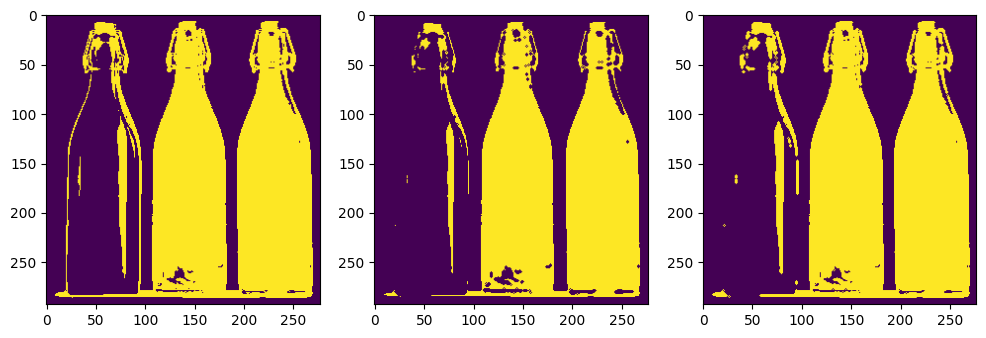

In [122]:
errode = erosion(binary_image)
dilated = dilation(errode)
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(binary_image)
axes[1].imshow(errode)
axes[2].imshow(dilated)
plt.show()

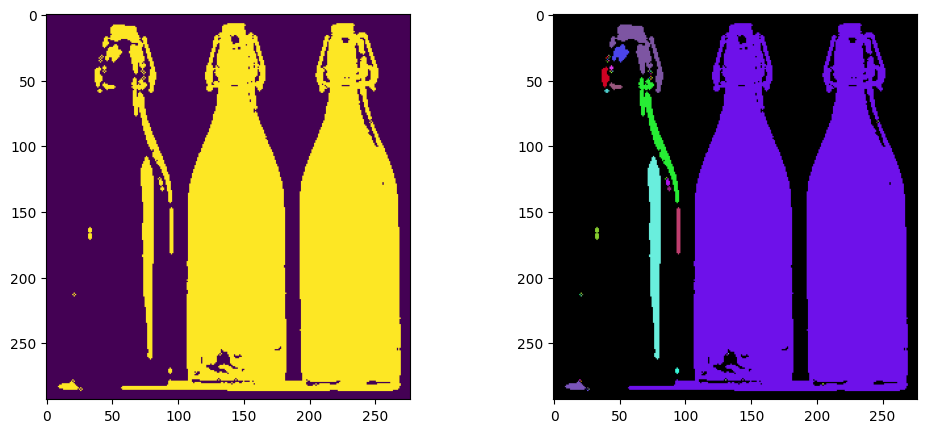

In [129]:
labels = two_pass(dilated)
colored_labels = np.zeros((*labels.shape, 3), dtype=np.uint8)
for l in np.unique(labels):
    if l == 0:  # background
        continue
    mask = labels == l
    colored_labels[mask] = np.random.randint(0, 255, size=3)


fig, axes = plt.subplots(1,2, figsize = (12,5))
axes[0].imshow(dilated)
axes[1].imshow(colored_labels)
plt.show()

### Task 1.3

* Use your color detection and connected components algorithm
* Implement simplest tracking algorithm
* Draw history of all previous points on the frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)

In [24]:
# code here

### Task 1.4 (BONUS)

* Find connected components using a one-pass algorithm in your image from Task 1.2
* Plot the resulting image and compare it to the result of your two-pass implementation (**RESULT**)

In [25]:
# code here

## Congratz, you made it! :)